# Supervised Learning - Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

In [43]:
# Library to help with numerical operations on arrays and matrices
import numpy as np

# Library used for data manipulation and analysis
import pandas as pd

# Libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# Library used to split the data into train and test set
from sklearn.model_selection import train_test_split

#Library used to build linear regression model
from sklearn.linear_model import LinearRegression

# Library used to check performance of the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Library used to build linear regression_model using statsmodels
import statsmodels.api as sm

# Library used for controlling the display of warning messages
import warnings
warnings.filterwarnings("ignore")

In [44]:
data = pd.read_csv("Dataset+-+User+Device+Data.csv")

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [45]:

data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


## Data Overview

- Observations
- Sanity checks

In [46]:

data. shape

(3454, 15)

* The dataset has 3454 rows and 15 columns

In [47]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Observations -
* main_camera_mp,selfie_camera_mp,int_memory,ram, battery and weight have some missing values
* brand_name, os, 4g and 5g are the categorical variables as they are object type , rest are all numerical data types

In [48]:

data.duplicated().sum()

0

* There are no duplicate values in the dataset

In [49]:

data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight columns contain missing values.

In [50]:
data.describe(include="all")

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


* There are 34 unique manufacturing phone brands, 4 unique operating systems. 
* 4gs and 5 gs take values yes or no for different values.
* Andriod is the most popular operating system in our data, being used in 3214 phones.
* 3302 phones provide 5g service, while 2335 provide 4g service.
* The mean values for most numerical data types like screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight,  are larger than median values, indicating that data may be positively skewed.
* The mean values and median values are almost similar for ram, normalized_used_price and normalized_new_price , indicating very little skewness, almost a normal distribution.
* The mean value for number of days the used/ refurbished phone has been used is less than median value, indicating data maybe negatively skewed.
* The range of normalized_used_price is 5.083 euros and of normalized_new_price is 4.946 euros.
* The variables battery, weight, int_memory, days_used have large standard deviation, indicating wide variations.

In [51]:
# We create a copy of the data just in caese to avoid any changes to original data
df = data.copy()

In [52]:
# Lets filter the data with numerical variables only

data.select_dtypes(include = np.number).columns

Index(['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price'],
      dtype='object')

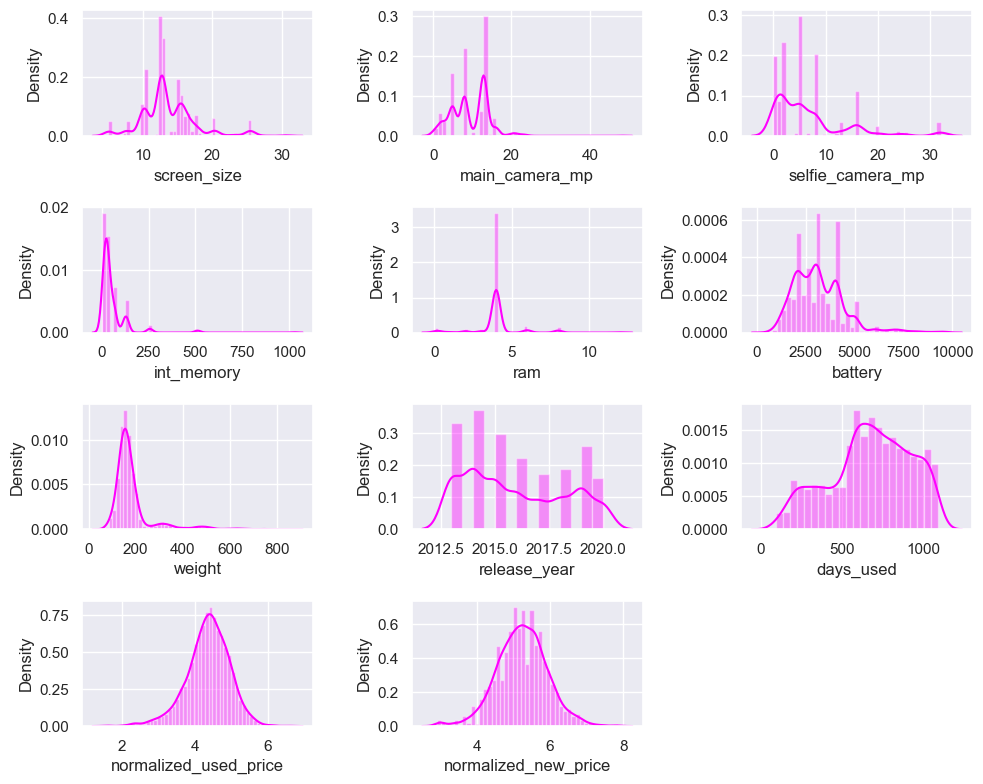

In [150]:
#Putting the numerical columns names in a variable
num_vars = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price']

nrows = 4
ncols = 3
iterator = 1

plt.figure(figsize = (10, 8))
for i in num_vars:
  plt.subplot(nrows, ncols, iterator)
  sns.distplot(data.loc[:, i], color = "magenta")
  iterator+=1

plt.tight_layout()
plt.show()

* The used_price, new_price and ram are almost normally skewed.
* screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight are left/positively skewed.
* number of days the used/ refurbished phone is left/ negatively skewed
* release year data has several peaks

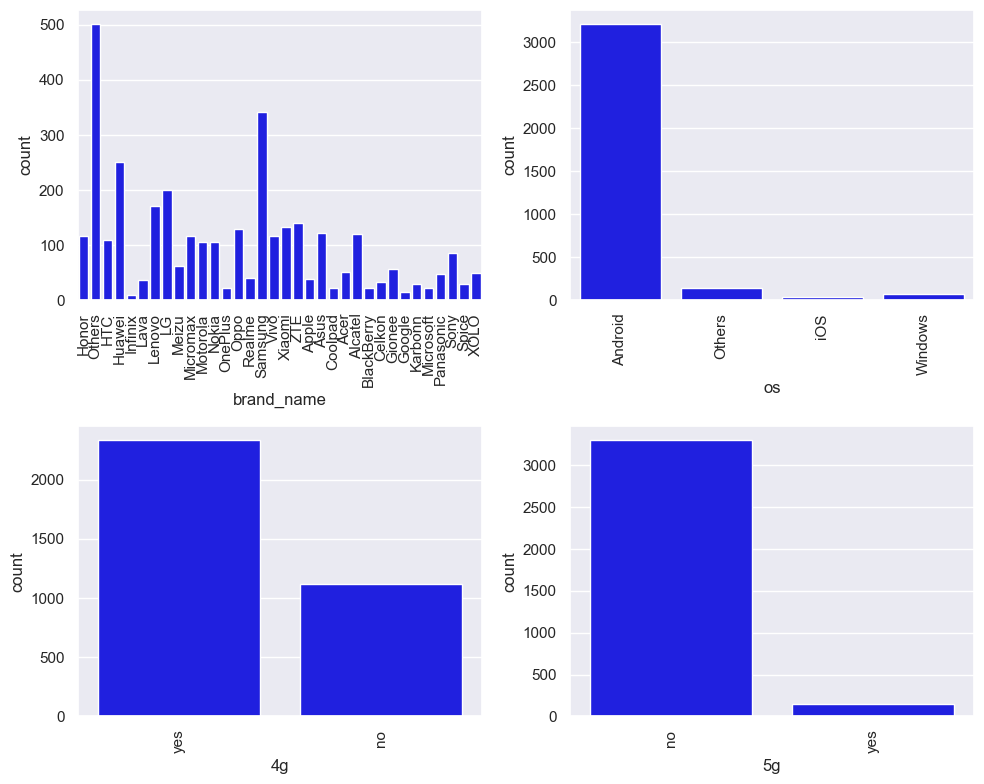

In [151]:
# Putting the categorical columns names in a variable
cat_vars = ['brand_name', 'os', '4g', '5g']

nrows = 2
ncols = 2
iterator = 1

plt.figure(figsize = (10, 8))
for i in cat_vars:
  plt.subplot(nrows, ncols, iterator)
  sns.countplot(x = i, data = data, color = "blue")
  iterator+=1
  plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()


* brand_name has a wide number of categories
* The most widely used Operating system is Andriod. Others being iOS, Windows and more
* Most of the phones have 4g Services available
* Very few phones have 5g service available

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [55]:
# function to plot a boxplot and a histogram

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [56]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

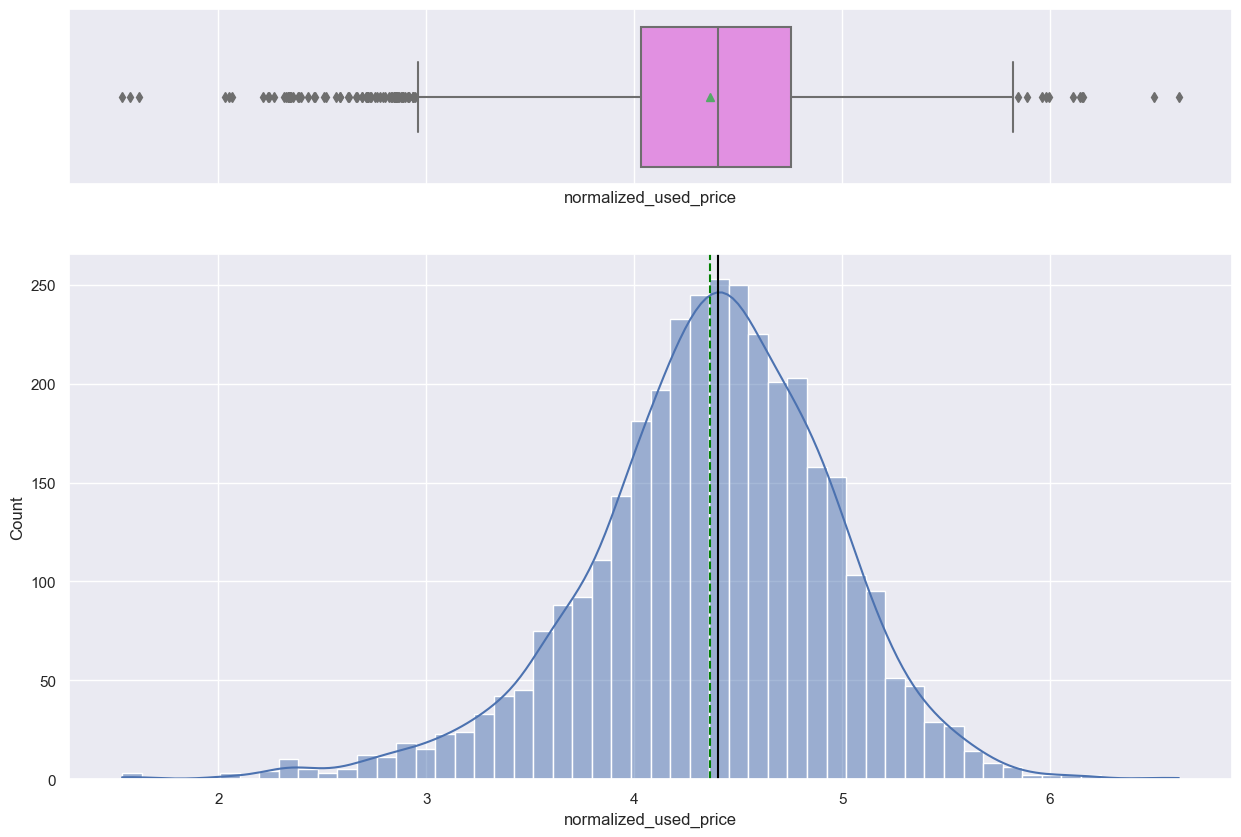

In [57]:
#1. What does the distribution of normalized used device prices look like?
histogram_boxplot(df, "normalized_used_price", kde=True)

* The mean normalized_used_price is 4.364 euros, and median price is 4.405 euros. The mean and median prices are almost equal. Hence data is normally distributed.
* A lot of outliers mostly in the lower end is evident from the boxplot.

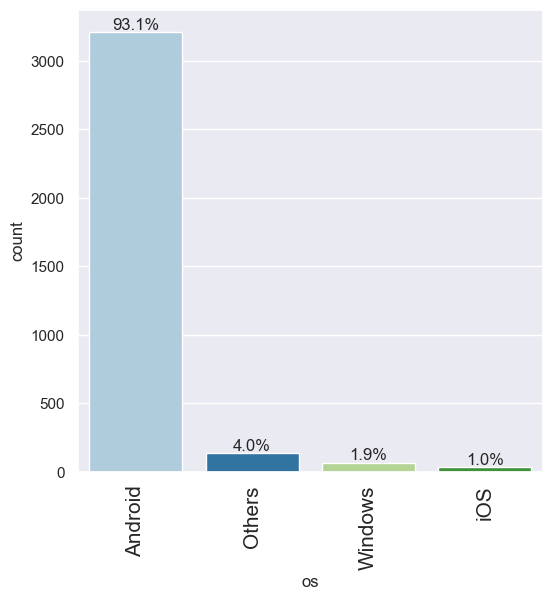

In [58]:
#2. What percentage of the used device market is dominated by Android devices?

labeled_barplot(df, "os", perc=True)

* Approximately 93% of the used/refurbished phone market is dominated by Android as their Operating Systems.

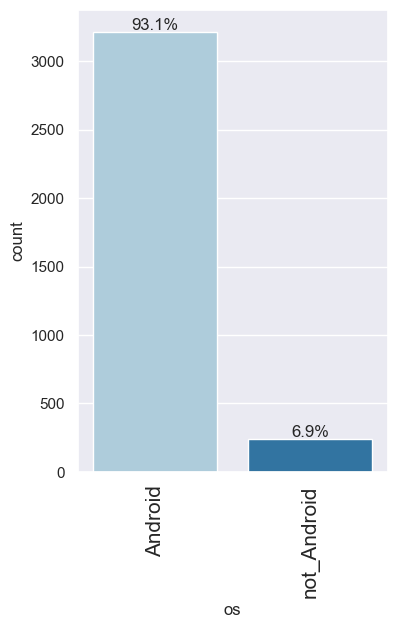

In [59]:
# since android is clearly dominating the os market, we can group others, windows and iOS together as a category- "not_Android"

df.loc[df.os=="Others", "os"] = "not_Android"
df.loc[df.os=="Windows", "os"] = "not_Android"
df.loc[df.os=="iOS", "os"] = "not_Android"

labeled_barplot(df, "os", perc=True)

* Total non-andriod based is OS is approximately only 7%.

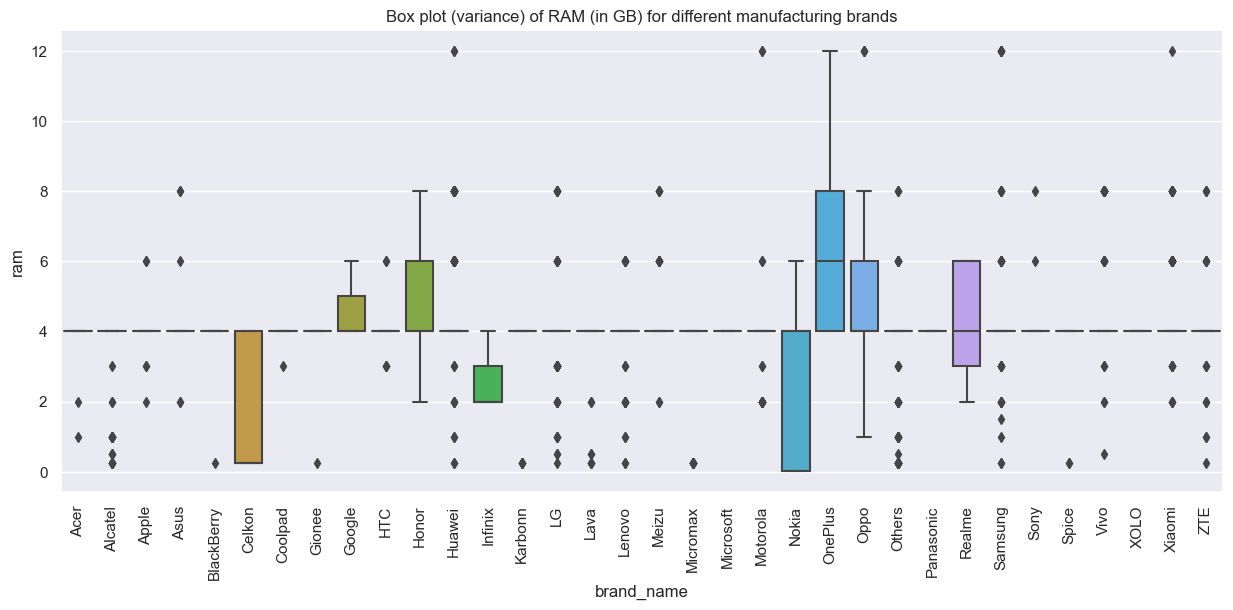

In [60]:
#3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

plt.figure(figsize=(15,6))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()


* The distribution of RAM across brands is widely varied.
* The most common RAM size is 4GB, which is a max, min, 25%, median and 75% quartile value for several manufacturing brands.
* There are huge amount of outliers (very high as well as very low).

In [61]:
#4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. 
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

df_largebatteries = df[df["battery"]>4500]
print(df_largebatteries.shape)


(341, 15)


* There are 341 refurbished/used phones with large batteries (i.e.>4500 mAh)

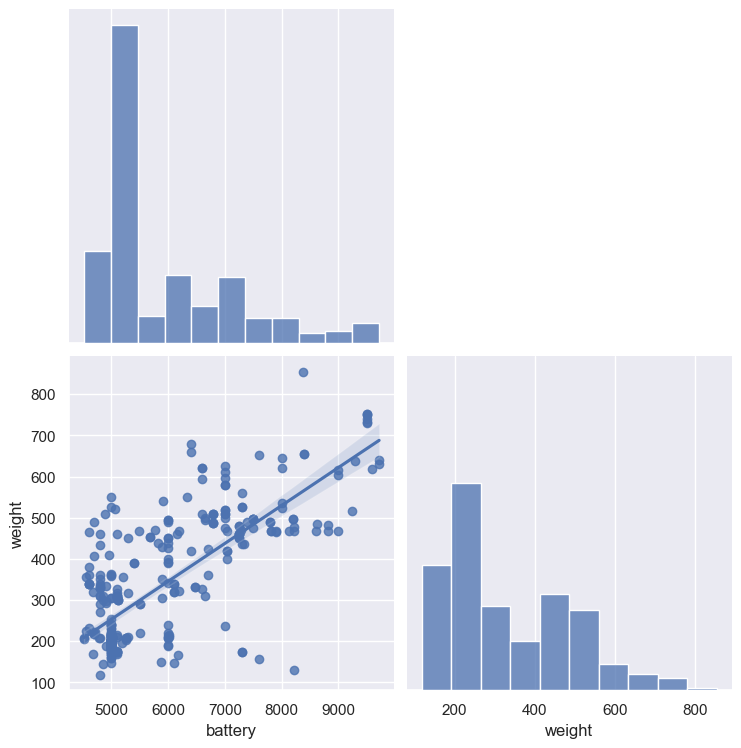

Linear correlation factor between phone's weight and battery 0.76


In [62]:
g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

* We notice a moderate correlation (0.76) between a phone's weight and battery, concluding that as the battery size increases, so does the weight.
* Hence the variables battery size and weight are positively related.

In [63]:
#5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. 
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?

#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]
print(df_largescreen.shape)


(1099, 15)


* There are 1099 refurbished/used phones with large screen size (i.e.>6 inches)

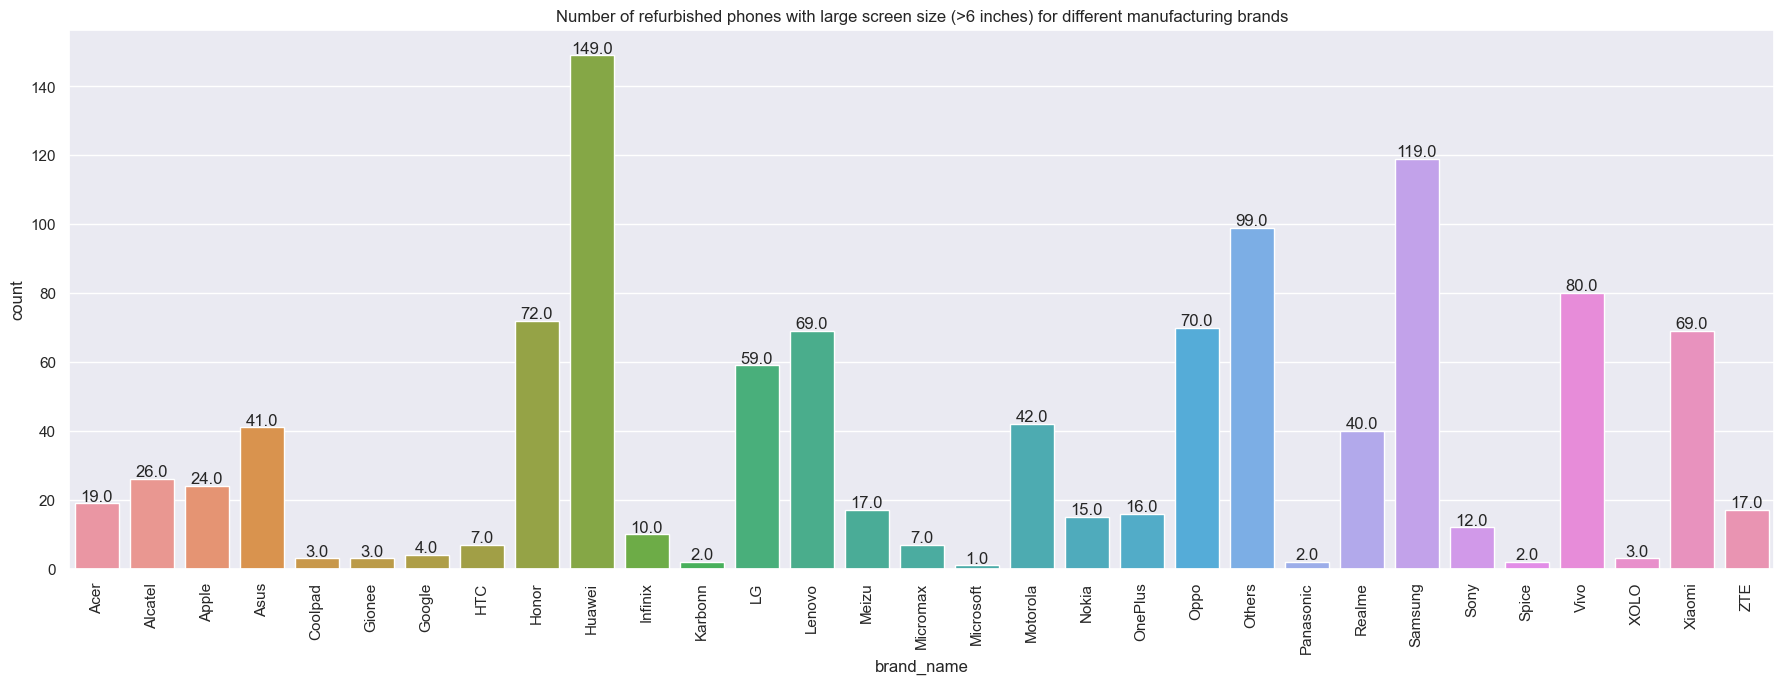

In [64]:
plt.figure(figsize=(22,7))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()


* Huawei has the highest number of refurbished/used phones with large screen (i.e. 149 phones), followed by Samsung (119 phones), Honor (72 phones), Vivo (80 phones), Xiaomi (69 phones) and Oppo (70 phones) among known manufacturing brands.
* Microsoft (1 phone), Karbonn/Panasonic/Spice (2 phones) have the lowest number of refurbished phones with large screen size.

In [65]:
#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
#What is the distribution of devices offering greater than 8MP selfie cameras across brands?

df_greatselfiecamera = df[df["selfie_camera_mp"]>8]
print(df_greatselfiecamera.shape)


(655, 15)


* There are 655 refurbished/used phones with great selfie cameras (i.e>8MP)

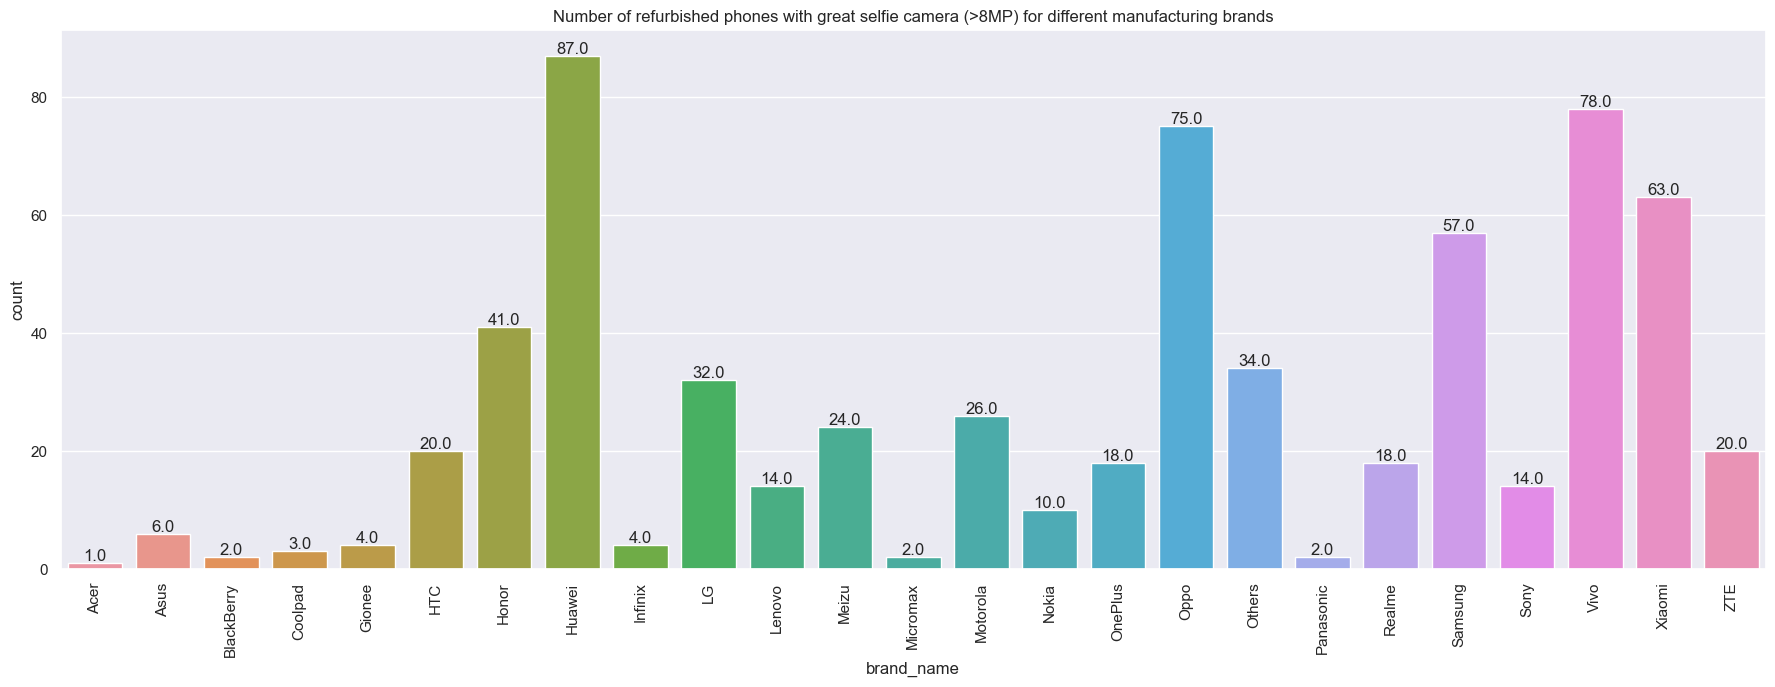

In [66]:
plt.figure(figsize=(22,7))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()


* Huawei (87 phones),  Vivo (78 phones), Oppo (75 phones), Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size.
* Acer (1 phone), Blackberry/Microsoft/Panasonic (2 phones) have some of the lowest number of refurbished phones with a great selfie camera (>8MP).

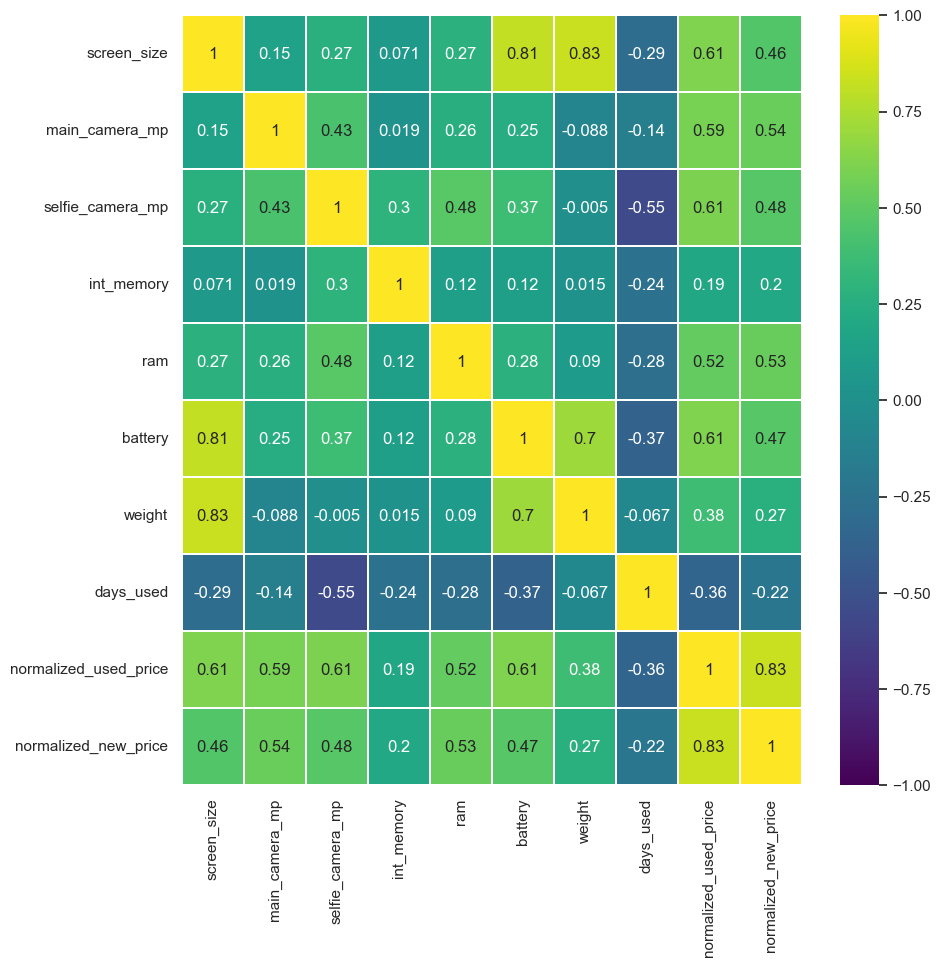

In [67]:
#7. Which attributes are highly correlated with the normalized price of a used device?
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="viridis", linewidths = 0.05);

* normalized_used_price is negatively correlated with days_used (-0.36)
* normalized_used_price is strongly-positively correlated with normalized_new_price (0.83)
* normalized_used_price is moderately-positively correlated with selfie_camera (0.61), main_camera (0.59), screen_size (0.61), battery (0.61)

In [80]:

# We will now bucket the 34 manufacturing brands into 3 categories on the average price of a new phone 
# by that manufacturing brand i.e. 
# low_range  : >4€
# mid_range  : 4€-6€
# high_range : >6€



In [81]:
df.loc[(df.normalized_new_price<4), "brand_name"] = "low_range"
df.loc[(df.normalized_new_price>=4) & (df.normalized_new_price<6) , "brand_name"] = "mid_range"
df.loc[df.normalized_new_price>=6, "brand_name"] = "high_range"

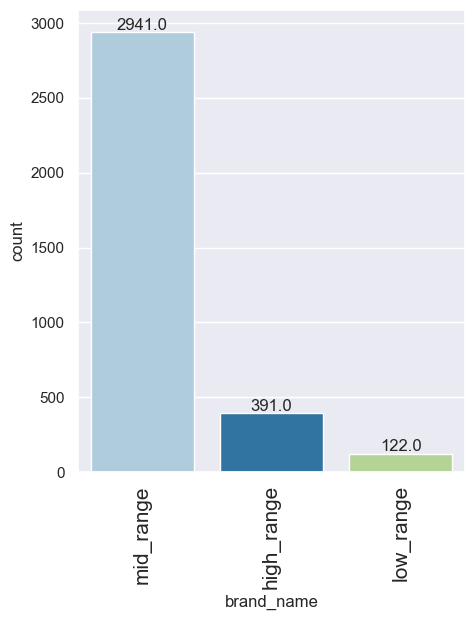

In [82]:
labeled_barplot(df, "brand_name")

- There are 3 manufacturing brand categories - low_range : 122 phones, mid_range :2941 phones and high_range : 391 phones

In [ ]:
# We will now bucket the days_used into 3 categories 
# old_model : >700 days_used
# moderately_old_model  : 400 - 700 days_used
# new_model : < 400 days_used

In [71]:
#df.loc[df.days_used>=700, "brand_name"] = "old_model"
#df.loc[(df.days_used>=400) & (df.days_used<700) , "brand_name"] = "moderately_old_model"
#df.loc[df.days_used<400, "brand_name"] = "new_model"

In [72]:
#labeled_barplot(df,"brand_name")

In [73]:
# - There are 3 types of model - old model : 1677 phones, moderately_old_model :1187 phones and new_model : 590 phones

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### 1. Missing value treatment

We have already seen in the DATA OVERVIEW section that our data has missing values in the columns main_camera_mp, selfie_camera_mp, int_memory, ram,
battery and weight which needs to be treated.

In [83]:

medianFiller = lambda x:x.fillna(x.median())

brand_names = df["brand_name"].unique()
numeric_column = df.select_dtypes(include = np.number).columns.to_list()

# we will group by brand name (low-range, mid-range or high-range), and for each numeric column, we will replace 
# the missing value with the median value of the numeric column of the respective brand name 

for item in brand_names:
    df.loc[df.brand_name==item, numeric_column] = \
    df.loc[df.brand_name==item, numeric_column].apply(medianFiller, axis=0)


In [86]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All the missing values are now treated

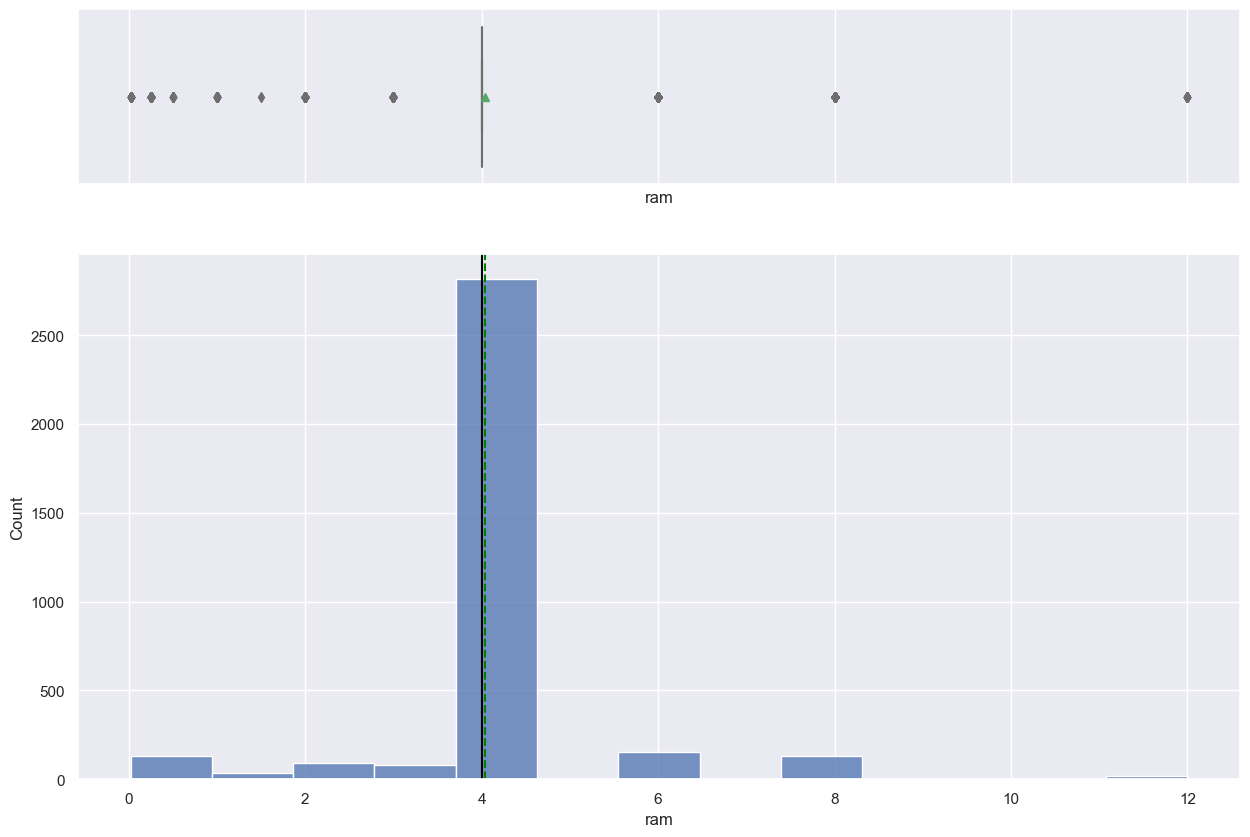

In [87]:
histogram_boxplot(df, "ram")

- We will drop "RAM" column as majority of dataset has a constant RAM of 4GB with a few upper and lower outliers.

In [88]:
df.drop("ram", axis=1, inplace=True)

In [94]:
numeric_columns.remove("ram")

In [92]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,mid_range,Android,14.50,yes,no,13.0,5.0,64.0,3020.0,146.0,2020,127,4.307572,4.715100
1,mid_range,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,2020,325,5.162097,5.519018
2,mid_range,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,2020,162,5.111084,5.884631
3,mid_range,Android,25.50,yes,yes,13.0,8.0,64.0,7250.0,480.0,2020,345,5.135387,5.630961
4,mid_range,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,2020,293,4.389995,4.947837


### 2. Outlier detection and treatment 

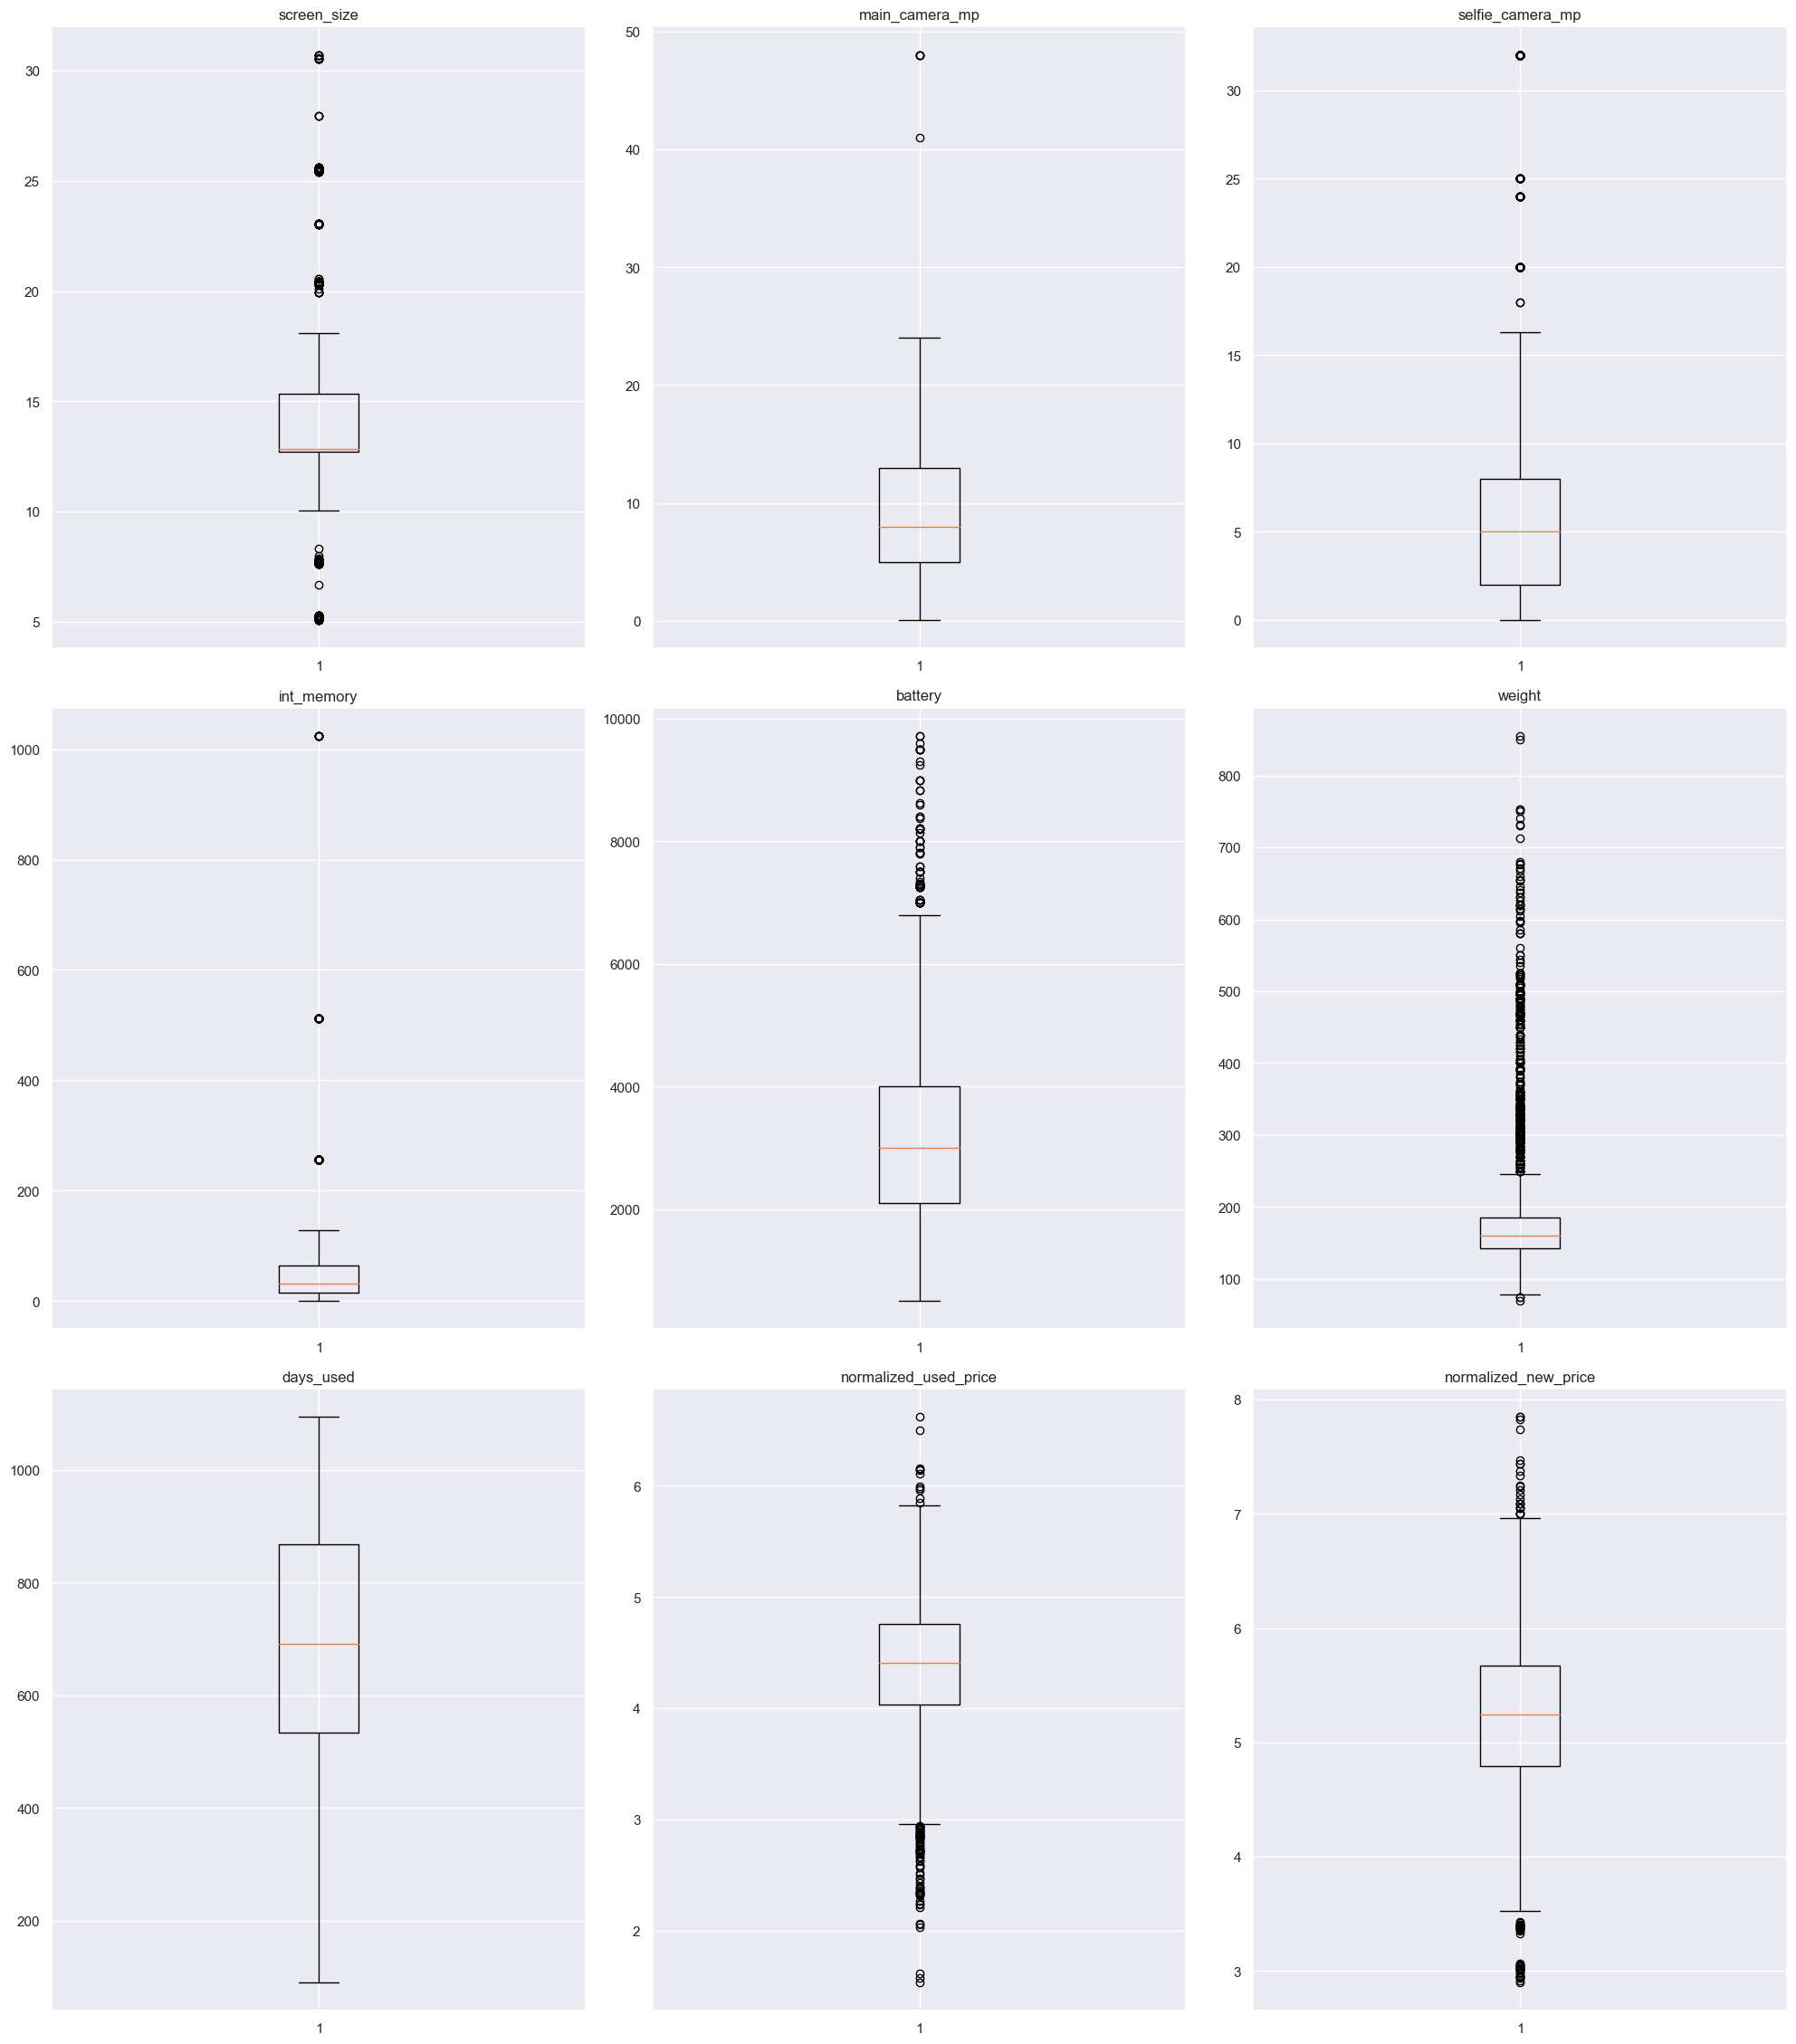

In [93]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- we can see that the days_used column have no outiers
- There are a few outliers in the upper part of the main_camera_mp, selfie_camera_mp, int_memory and battery. 
- There are more than a few upper outliers in the screen_size and weight columns
- There are some upper and lower outliers in the normalized_new_price independent and normalized_used_price dependent columns

In [95]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [96]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

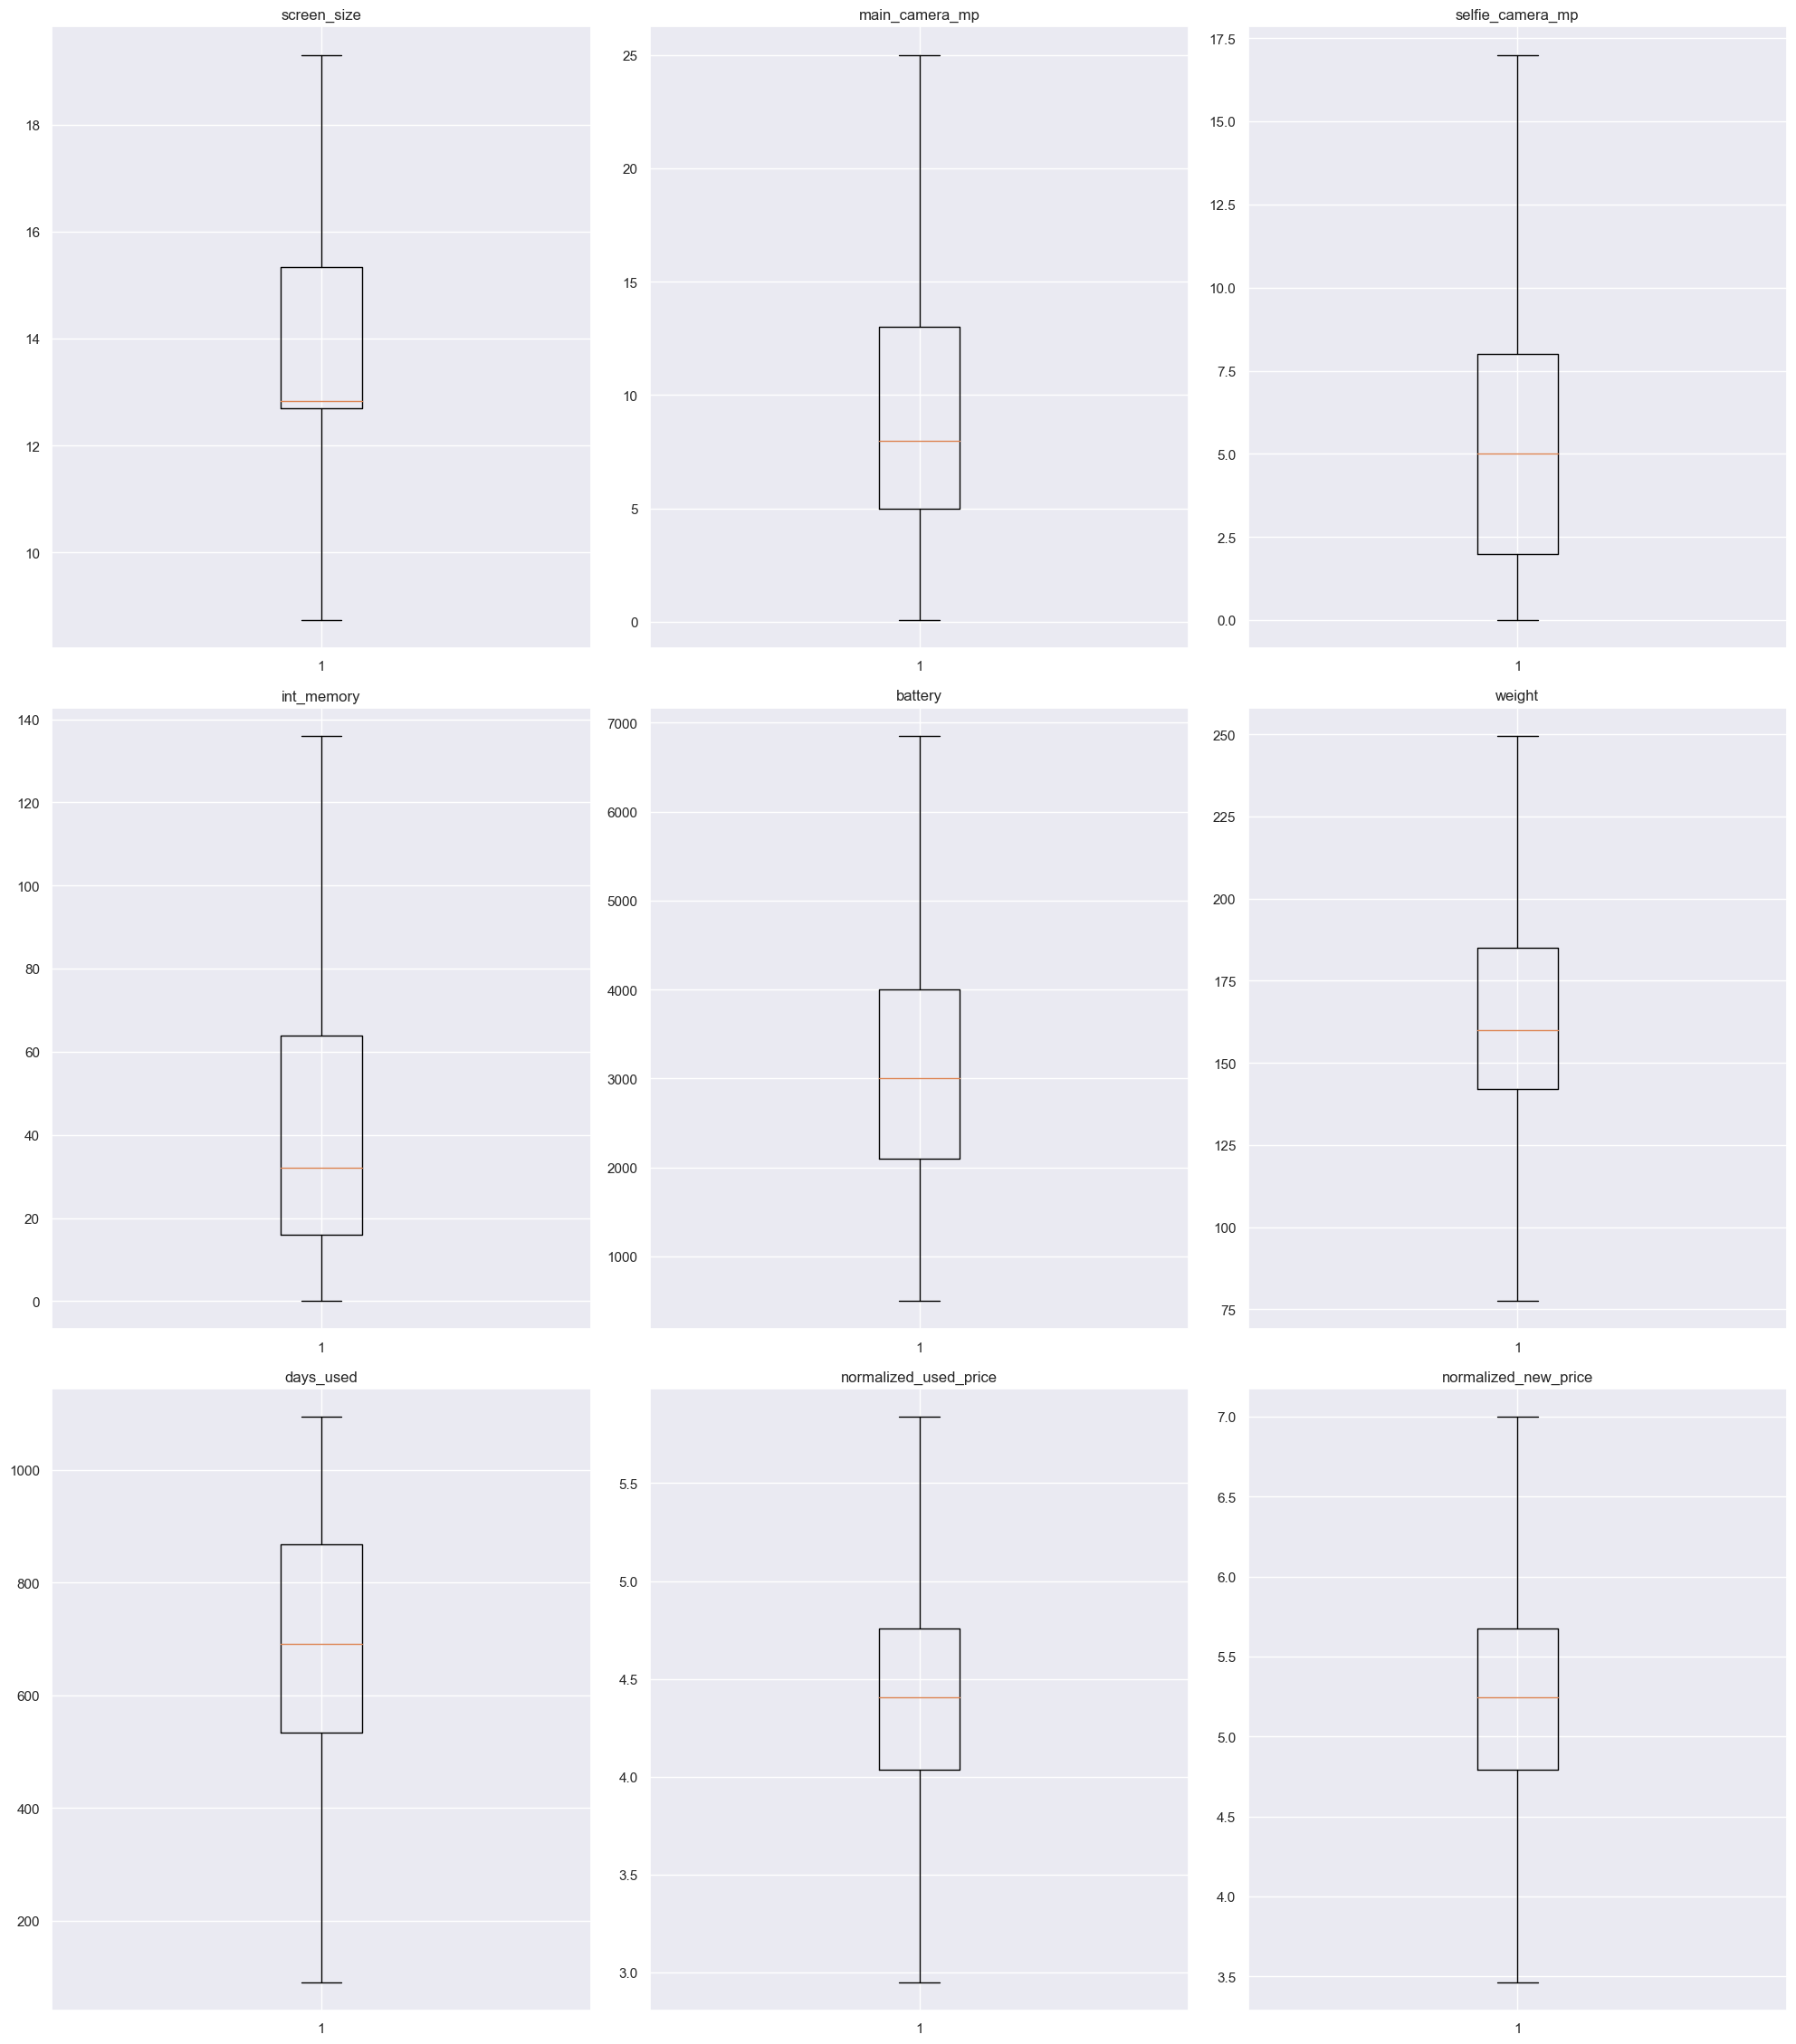

In [98]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- No outliers can be seen in the upper and lower regions

## EDA

In [102]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,3,mid_range,2941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,2,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.516844,4.588375,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.963578,5.346585,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.680223,39.089196,0.01,16.0,32.0,64.0,136.0
battery,3454.0,NaN,NaN,NaN,3108.449479,1213.517309,500.0,2100.0,3000.0,4000.0,6850.0
weight,3454.0,NaN,NaN,NaN,166.868196,38.821424,77.5,142.0,160.0,185.0,249.5


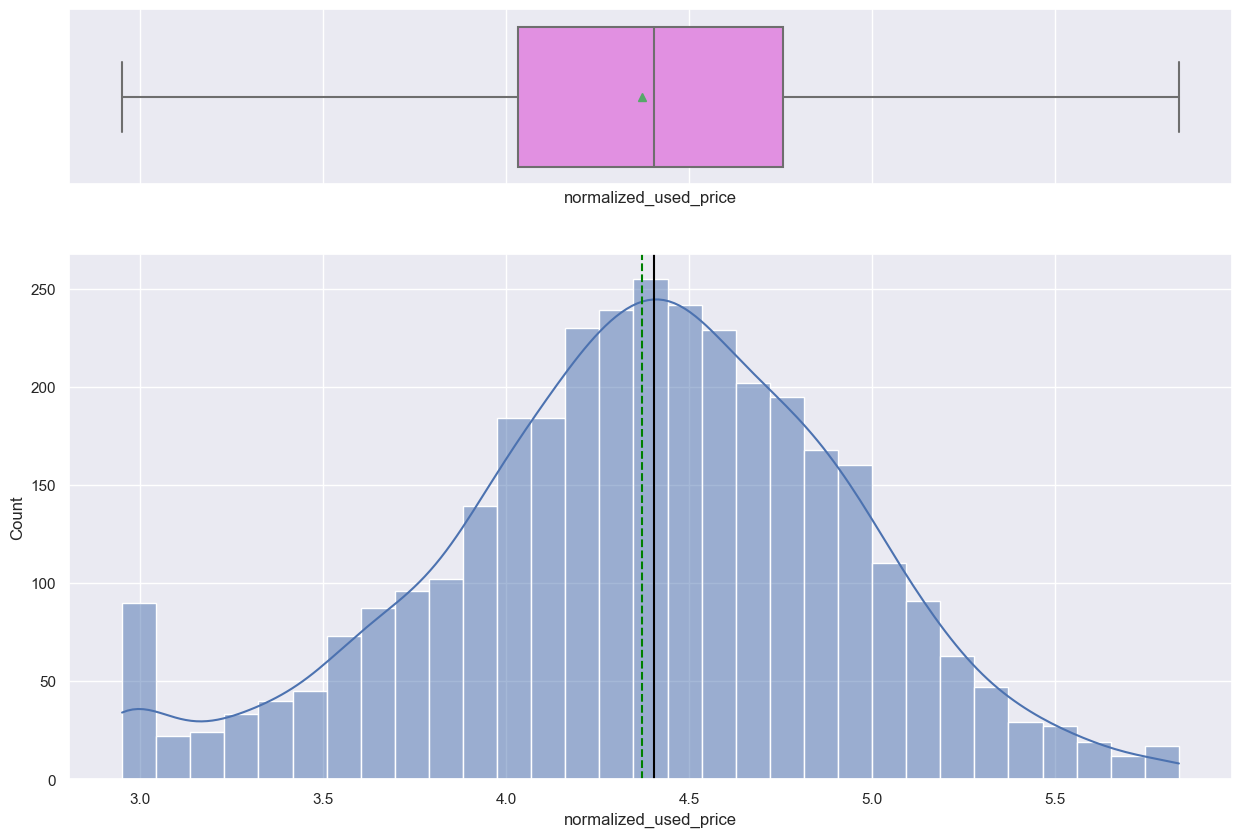

In [100]:
#1. What does the distribution of normalized used device prices look like?
histogram_boxplot(df, "normalized_used_price", kde=True)

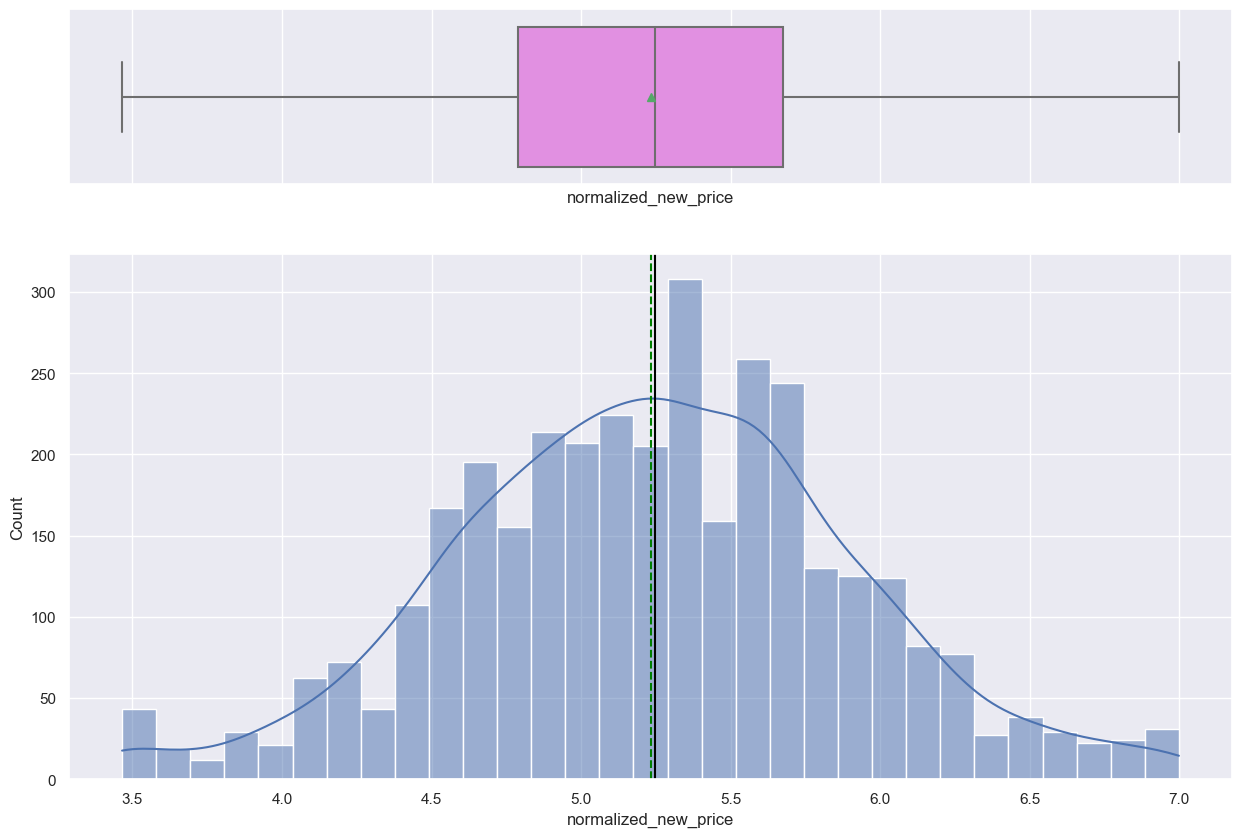

In [101]:
histogram_boxplot(df, "normalized_new_price", kde=True)

- After the outlier treatment,the outliers in both the normalized_used_price & normalized_new_price have been removed totally.
- The mean and median prices are almost equal. Hence data is normally distributed.


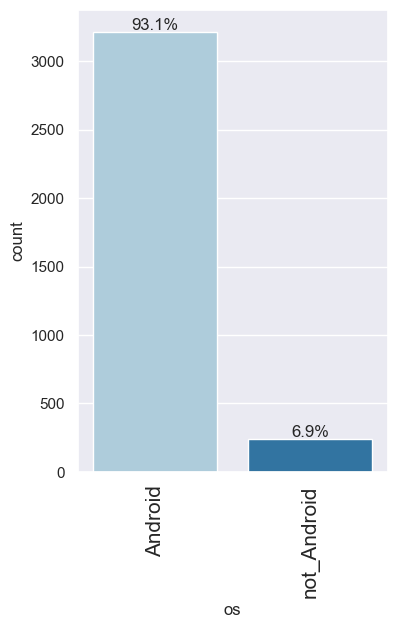

In [103]:
#2. What percentage of the used device market is dominated by Android devices?

labeled_barplot(df, "os", perc=True)

- The percentage of Android and non_android market have remained the same.

In [105]:
#4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. 
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

df_largebatteries = df[df["battery"]>4500]
print(df_largebatteries.shape)


(341, 14)


- Here since the "ram" column is dropped so there are 14 columns showing 

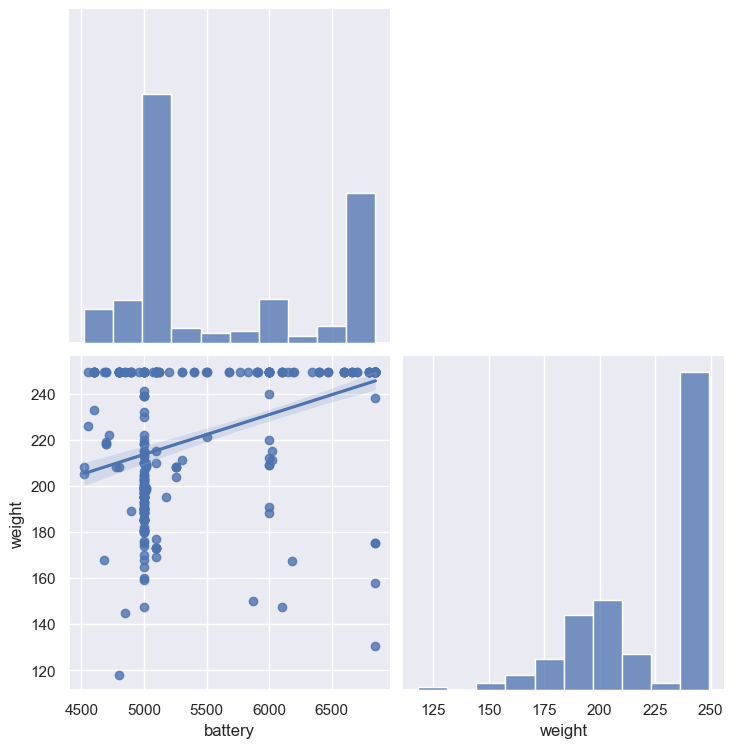

Linear correlation factor between phone's weight and battery 0.48


In [106]:
g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

- Though the variables battery size and weight are positively related, there correlation is very low, 0.48
- The linear correlation between a phone's weight and battery has dropped from 0.7 to 0.4 after outlier treatment, i.e., has become weaker

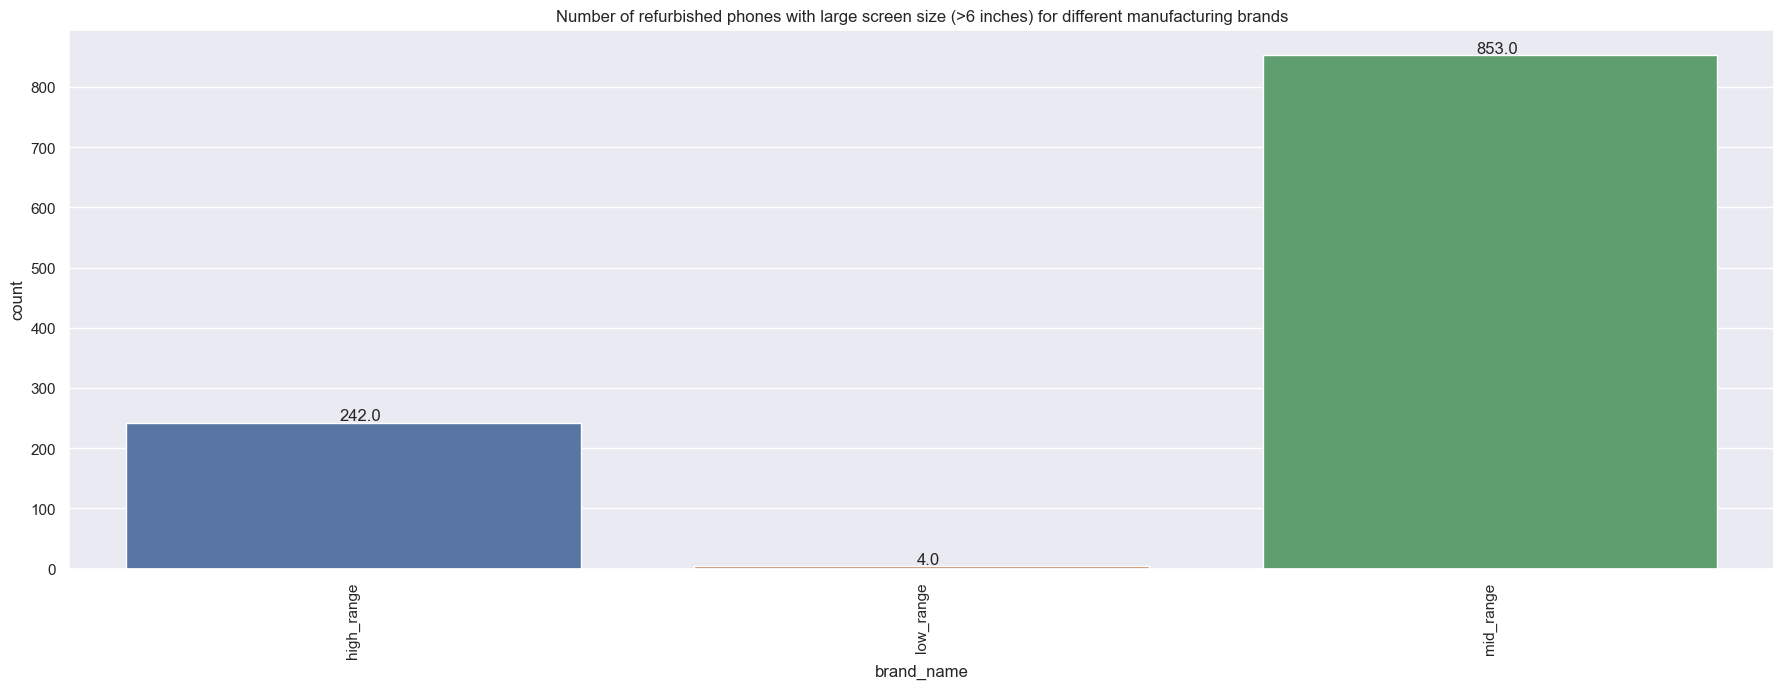

In [108]:
#5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. 
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?

plt.figure(figsize=(22,7))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(5, 5),textcoords="offset points",)  
plt.show()

- 242 of the phones that are of high range have a screen size of >6 inches
- 853 of the phones that are of medium range have a screen size of >6 inches
- Only 4 phones that are of low range have a screen size of >6 inches
- mid_range brands offer maximum number of refurbished phones with large screen size (853 phones), followed by high_range brands (242 phones) and then low_range brands (4 phones)

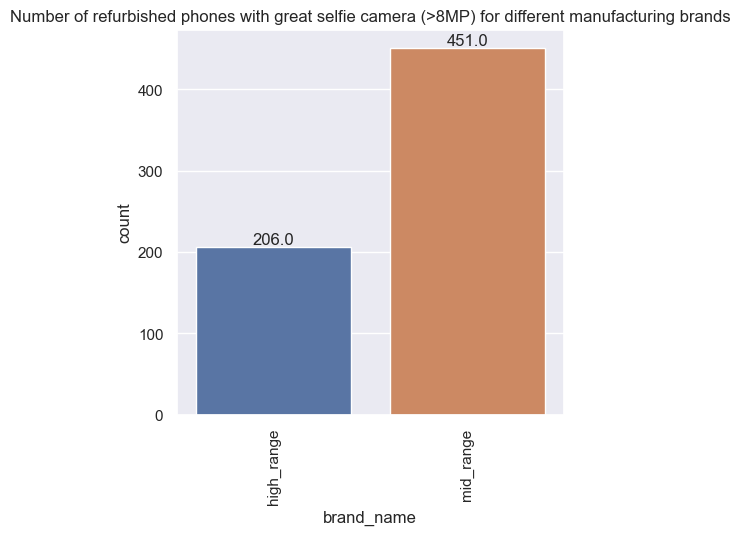

In [110]:
#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
#What is the distribution of devices offering greater than 8MP selfie cameras across brands?

df_greatselfiecamera = df[df["selfie_camera_mp"]>8]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

- We can see mid_range brands offer the maximum number of refurbished phones with selfie_camera (451 phones), followed by mid_range brands (206 phones) and then low_range brands have no phones with selfie camera (>8MP)

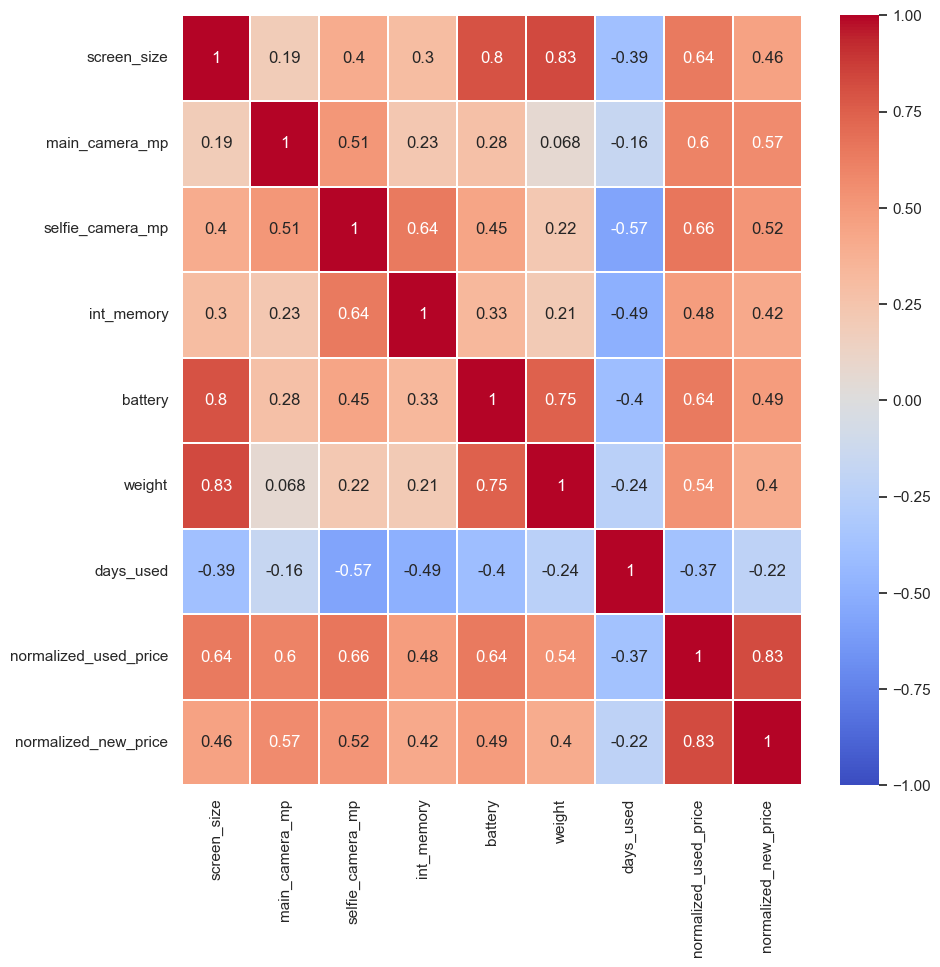

In [113]:
## 7. Reanalyzing linear correlation between numerical attributes and used phone price

numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", linewidths=0.05);

- normalized_used_price has become marginally more negatively correlated with number of days_used (-0.37 vs. -0.36 before outlier treatment)
- normalized_used_price is still strongly-positively correlated with normalized_new_price ; 0.83 before & after outlier treatment
- The linear correlation with selfie_camera (0.66 vs. 0.61 before), main_camera (0.6 vs. 0.59 before), screen_size (0.64 vs. 0.61 before), battery ( 0.64 vs. 0.61 before) have all increased in comparison to values before outlier treatment

## Model Building - Linear Regression

In [115]:
# defining X and y variables
X = df.drop(["normalized_used_price", "release_year"], axis=1) # since year is a temporal variable
y = df["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0  mid_range  Android        14.50  yes   no            13.0   
1  mid_range  Android        17.30  yes  yes            13.0   
2  mid_range  Android        16.69  yes  yes            13.0   
3  mid_range  Android        19.30  yes  yes            13.0   
4  mid_range  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   6850.0   249.5        345   
4               8.0        64.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: norm

In [116]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()


(3454, 13)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_low_range,brand_name_mid_range,os_not_Android,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,0,1,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,1,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,1,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345,5.630961,0,1,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,0,1,0,1,0


- The brand_name_high_range column is not showing while running the one hot encoding.
- To avoid Dummy variable trap, we take (k-1) variables.
- So here we have brand_name_low_range and brand_name_mid_range and not the brand_name_high_range column.

In [117]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [118]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [119]:
## Checking the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.040638
main_camera_mp,0.020630
selfie_camera_mp,0.017417
int_memory,0.000729
battery,0.000021
weight,0.001194
days_used,0.000004
normalized_new_price,0.357875
brand_name_low_range,-0.264017
brand_name_mid_range,0.006378


**LINEAR REGRESSION EQUATION**
- **normalized_use_price** = 1.3136 + (0.0406)**screen_size** + (0.0206)**main_camera_mp** + (0.0174)**selfie_camera_mp** + (0.0007)**int_memory** + (0.0000)**battery** + (0.0011)**weight** + (0.0000)**days_used** + (0.3578)**normalized_new_price** - (0.2640)**brand_name_low_range** + (0.0063)**brand_name_mid_range** + (0.0792)**os_not_Android** + (0.0428)**4g_yes** + (0.0231)**5g_yes** + e

## Model Performance Check

- Model performance evaluation
    - metric functions defined in sklearn for RMSE, MAE, and R^2
    - user defined function to calculate MAPE and adjusted R^2 

In [120]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [121]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.221822,0.176281,0.845739,0.844904,4.130973


In [122]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.219999,0.176234,0.844742,0.842769,4.099166


**Observations**
- The training R^2 is 0.84, indicating that the model explains approx. 84% of the variation in the train data. So, the model is not underfitting
- MAE (0.176, 0.176) and RMSE (0.2218, 0.2199) on the train and test sets are comparable, which shows that the model is not overfitting
- MAE indicates that our current model is able to predict normalized_used_price within a mean error of 0.176 on the test data
- MAPE on the test set suggests we can predict within 4.099% of normalized_used_price

### Linear Regression using statsmodels

In [123]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     1013.
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                           18:54:11   Log-Likelihood:                 210.14
No. Observations:                   2417   AIC:                            -392.3
Df Residuals:                       2403   BIC:                            -311.2
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**

- Negative values of the coefficient show that normalized_used_price decreases with the increase of brand_name_low_range 

- Positive values of the coefficient show that normalized_used_price increases with the increase of corresponding attribute value

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. 

- accordingly attributes such as **days_used** , **brand_name_mid_range** and **5g_yes** are insignificant.

But these variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## 1. TEST FOR MULTICOLLINEARITY

### Variance Inflation Factor (VIF):
#### Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors.
* If VIF is between 1 and 5, then there is low multicollinearity
* If VIF is between 5 and 10, we say there is moderate multicollinearity
* If VIF is exceeding 10, it shows signs of high multicollinearity

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [125]:
checking_vif(x_train1)

,feature,VIF
0,const,255.714781
1,screen_size,5.152824
2,main_camera_mp,2.158114
3,selfie_camera_mp,3.022867
4,int_memory,2.151289
5,battery,3.570735
6,weight,4.379195
7,days_used,1.791773
8,normalized_new_price,3.648465
9,brand_name_low_range,2.668431


* The screen_size of a phone has VIF marginally above 5
* Rest all the variables have VIF values below 5, indicating absence of multicollinearity in the model
* Since Multicollinearity is abesent, no treatment regarding this is needed

## Removing Multicollinearity
#### To remove multicollinearity

* Drop every column one by one that has a VIF score greater than 5
* Look at the adjusted R-squared and RMSE of all these models
* Drop the variable that makes the least change in adjusted R-squared
* Check the VIF scores again
* Continue till you get all VIF scores under 5

In [126]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp


In [127]:
col_list = ["screen_size"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.837108,0.22799


* We will drop screen_size and check for VIF again

In [128]:
col_to_drop = "screen_size"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,244.526842
1,main_camera_mp,2.155419
2,selfie_camera_mp,2.970107
3,int_memory,2.151247
4,battery,3.189259
5,weight,2.634135
6,days_used,1.756673
7,normalized_new_price,3.643586
8,brand_name_low_range,2.664363
9,brand_name_mid_range,2.538587


### The above predictors have no multicollinearity and the assumption is satisfied
#### Let's check the model performance

In [129]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1036.
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                           19:16:47   Log-Likelihood:                 150.36
No. Observations:                   2417   AIC:                            -274.7
Df Residuals:                       2404   BIC:                            -199.5
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**Observations**
* We can see that adj. R-squared has remained approx. same 0.84 for the train set (70% dataset), which shows that the dropped column (screen_size) did not have much effect on the model
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance
* **days_used**, **brand_name_mid_range**, **5g_yes** have **p-value > 0.05**. So, they are not significant and we'll drop them. But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once. Instead, we will do the following:
    * Build a model, check the p-values of the variables, and drop the column with the highest p-value
    * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    * Repeat the above two steps till there are no columns with p-value > 0.05

In [130]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'normalized_new_price', 'brand_name_low_range', 'os_not_Android', '4g_yes']


In [131]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [132]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1380.
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                           19:23:26   Log-Likelihood:                 148.64
No. Observations:                   2417   AIC:                            -277.3
Df Residuals:                       2407   BIC:                            -219.4
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final ones and olsmod2 as final model
* Selected features main_camera_mp,selfie_camera_mp, int_memory,battery,weight, normalized_new_price,os_not_Android and 4g_yes have positive influence and brand_name_low_range have negative influence on normalized_used_price

**Observations**

* Now adjusted R-squared is approx 0.84, i.e., our model is able to explain ~84.0% of the variance. This shows that the model is good
* The adjusted R-squared in olsmod0 (where we considered all the variables) was also 0.84. This shows that the variables we dropped were not affecting the model much.

## 2. TEST FOR LINEARITY AND INDEPENDENCE

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable
* If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant

### Check for linearity and independence-

* Make a plot of fitted values vs residuals
* If they don't follow any pattern, then we say the model is linear and residuals are independent
* Otherwise, the model is showing signs of non-linearity and residuals are not independent

In [133]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.275745,-0.013769
3141,4.175156,3.933367,0.241789
1233,4.117410,4.459641,-0.342232
3046,3.782597,3.912513,-0.129915
2649,3.981922,3.935019,0.046903


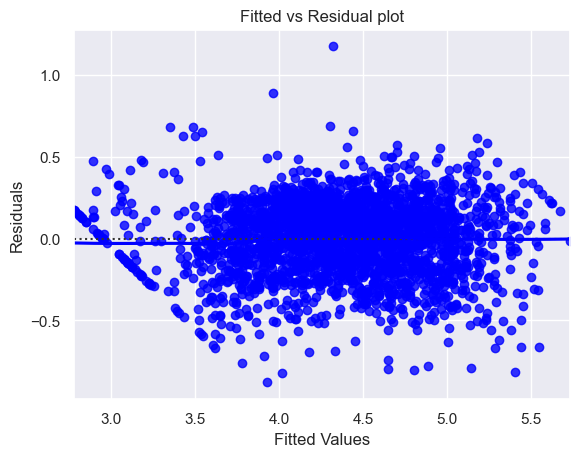

In [136]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values)

We see that there is no pattern in the plot of residuals vs fitted values. The pattern thus indicate that the model is linear and residuals are independent. **Given the context of the problem, assumption of Linearity is thus satified**

## 3. TEST FOR NORMALITY


* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model

* The shape of the histogram of residuals can give an initial idea about the normality

* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not

* Other tests to check for normality includes the Shapiro-Wilk test

    * **Null hypothesis**: Residuals are normally distributed
    * **Alternate hypothesis**: Residuals are not normally distributed

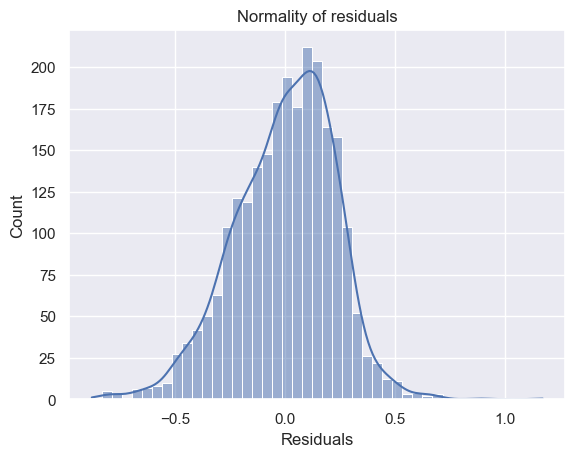

In [137]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

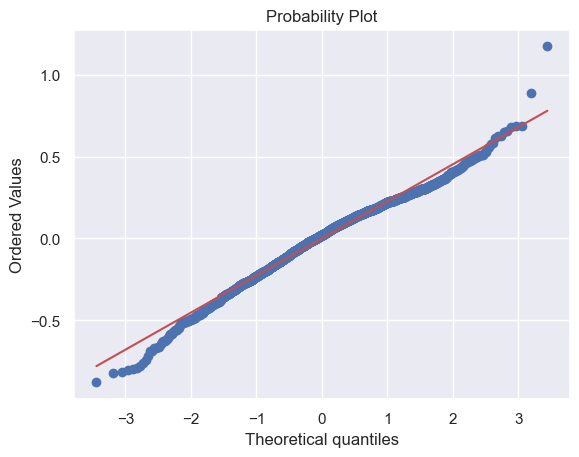

In [138]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line except for the tails
* Let's check the results of the Shapiro-Wilk test

In [139]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9876047372817993, pvalue=1.1960422344366173e-13)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
* Strictly speaking, the residuals are not normal
* However, as an approximation, we can accept this distribution as close to being normal

### So, the assumption is satisfied

## 4. TEST FOR HOMOSCEDASTICITY

- **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic

- **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic

- The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers

- The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape

- The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic

    - **Null hypothesis**: Residuals are homoscedastic
    - **Alternate hypothesis**: Residuals have heteroscedasticity

In [140]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0182918597438748), ('p-value', 0.3768721582370704)]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

In [141]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1174,94.430815,88.787481
2247,81.238798,65.870254
2991,73.078043,63.671099
2997,79.009214,80.917259
2982,100.529127,100.816100
479,78.660741,74.663072
17,109.011245,112.188435
471,105.280149,85.893465
2918,90.069046,88.001863
602,57.177211,68.619961


- We can observe here that our model has returned good prediction results, and the actual and predicted (used_price) are comparable, although there is further scope for improvement

- We can also visualize comparison result as a bar graph

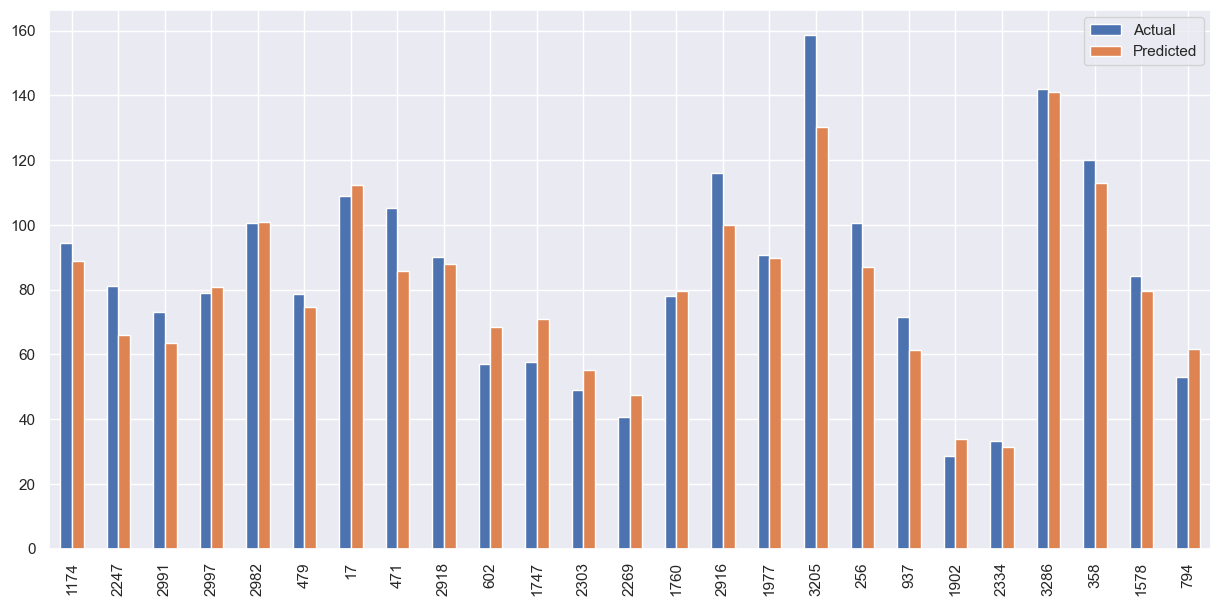

In [142]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [143]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227538,0.180719,0.837686,0.837012,4.243668


In [144]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.223332,0.178791,0.840001,0.838442,4.170598


* The model is able to explain ~84% of the variation in the data, which is very good

* The train and test RMSE and MAE (~0.22 and ~0.18) are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.7% of normalized_used_price

* Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes

### Comparing the initial model created with sklearn and the final statsmodels model

In [145]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.221822,0.227538
MAE,0.176281,0.180719
R-squared,0.845739,0.837686
Adj. R-squared,0.844904,0.837012
MAPE,4.130973,4.243668


In [146]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.219999,0.223332
MAE,0.176234,0.178791
R-squared,0.844742,0.840001
Adj. R-squared,0.842769,0.838442
MAPE,4.099166,4.170598


* The performance of the two models is close to each other

## Final Model

* Recreating the final statsmodels model and printing it's summary to gain insights.

In [147]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1380.
Date:                   Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                           19:58:56   Log-Likelihood:                 148.64
No. Observations:                   2417   AIC:                            -277.3
Df Residuals:                       2407   BIC:                            -219.4
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**FINAL LINEAR REGRESSION EQUATION**
- **normalized_use_price** = 1.5091 + (0.0199)**main_camera_mp** + (0.0204)**selfie_camera_mp** + (0.0008)**int_memory** + (0.0000)**battery** + (0.0029)**weight** + (0.3545)**normalized_new_price** - (0.3080)**brand_name_low_range** + (0.0611)**os_not_Android** + (0.0436)**4g_yes** + e

## Actionable Insights and Recommendations 

### Interpretation of R-squared

    - The R-squared value tells us that our model can explain 84.00% of the variance in the training set.

### Interpretation of Coefficients

    - The coefficients tell us how one unit change in X can affect y.

    - The sign of the coefficient indicates if the relationship is positive or negative.

    - In this data set, for example, 
            - an increase of a unit in main_camera_mp leads to an increase in the used_price by 0.0199 euros, 
            - a unit increase in selfies_camera_mp leads to an increase in the used_price by 0.0204 euros, 
            - a unit increase in normalized_new_price leads to an increase in the used_price by 0.3545 euros

    - Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

    - When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable. But this dataset is rectified from multicolinearity hence the coefficients are queit reliable.

### Interpretation of p-values (P > |t|)

    - For each predictor variable there is a null hypothesis and alternate hypothesis.

    - Null hypothesis : Predictor variable is not significant
    - Alternate hypothesis : Predictor variable is significant
    There are no variables with the P_value>0.05, hence we can say the predictor variable is significant in this data set.

    - Hence, we can conclude the model "olsmodel_final" is good for prediction as well as inference purposes.



### Conclusions

    - linear correlation between normalized_used_price and normalized_new_price during EDA was found to be strongly postive (0.83), therby reafirming model validity.
    
    - EDA post data processing also indicated medium_brand (i.e., expensive brands) have the maximum number of refurbished phones with better selfie_camera and low_brand (i.e, cheaper brands) have the lowest number of such refurbished phones, thereby reaffirming the validity of the model
    
    - 4g is significant parameter in our model, contributing positively to normalized_used_price as expected
    
    - Preliminary EDA revealed moderately positive correlation between weight of the phone and battery as the battery size increases (0.7), however, weight, although a bit sgnificant factor in the model but battery have been found to be not significant factor in predicting normalized_used_price of the phones. RAM for the refurbished phones was found to be constant ~4GB on average across the dataset, and also insignificant. Similar to RAM, almost 90% of phones were found to be operating on Android os, also insignificant factor for prediction so Android os is dropped from the model.
    
    - The linear predictive model is able to predict the normalised_used_price of the phone, explaining ~84% of the variance in the data, within a mean absolute percentage error of ~4.17%. The model is hence good.
    
    -  All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs<5, normality of error terms and homoscedasticity. While the independence and linearity assumption can be assumed met after suitable transformation/data preprocessing.
    
  

### BUSINESS RECOMMENDATIONS

- Future data collections need to be done on the age of customers purchasing products, since age could be a major drive. millenial customers may tend to want a 5g or a newer version.

- Future data collection on income could also be done to know what more high income customer want.

___